In [27]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets.california_housing import fetch_california_housing
housing = fetch_california_housing()
print(housing.data.shape)
print(housing.data[0])
housing.data[1]

(20640, 8)
[   8.3252       41.            6.98412698    1.02380952  322.
    2.55555556   37.88       -122.23      ]


array([ 8.30140000e+00,  2.10000000e+01,  6.23813708e+00,  9.71880492e-01,
        2.40100000e+03,  2.10984183e+00,  3.78600000e+01, -1.22220000e+02])

In [12]:
from sklearn import tree
dtr = tree.DecisionTreeRegressor(max_depth=2)
print(dtr.fit(housing.data[:,[6,7]],housing.target))
# 可视化显示
dot_data = tree.export_graphviz(dtr,out_file=None,feature_names=housing.feature_names[6:8],filled=True,impurity= False,rounded=True)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')


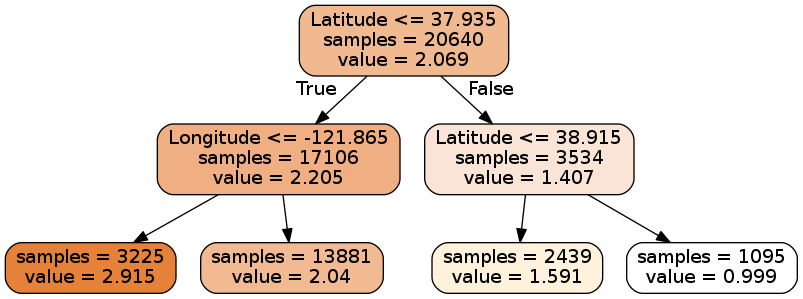

In [13]:
# 可视化的显示安装
import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)  
graph.get_nodes()[7].set_fillcolor("#FFF2DD")
from IPython.display import Image
Image(graph.create_png())

In [14]:
graph.write_png('dtr_white_background.png')

True

In [15]:
from sklearn.model_selection import train_test_split
data_train,data_test,target_train,target_test=train_test_split(housing.data,
housing.target,test_size=0.1,random_state=42)
data_train

array([[   3.8372    ,   41.        ,    5.26595745, ...,    3.01276596,
          33.91      , -118.29      ],
       [   8.0069    ,   52.        ,    7.22403259, ...,    2.598778  ,
          37.73      , -122.46      ],
       [   3.6712    ,   30.        ,    3.65998256, ...,    2.3347864 ,
          37.46      , -122.15      ],
       ...,
       [   2.9344    ,   36.        ,    3.98671727, ...,    3.33206831,
          34.03      , -118.38      ],
       [   5.7192    ,   15.        ,    6.39534884, ...,    3.17889088,
          37.58      , -121.96      ],
       [   2.5755    ,   52.        ,    3.40257649, ...,    2.10869565,
          37.77      , -122.42      ]])

In [16]:
dtr=tree.DecisionTreeRegressor(random_state=42)
dtr.fit(data_train,target_train)
dtr.score(data_test,target_test)

0.637318351331017

In [17]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=42)
rfr.fit(data_train,target_train)
rfr.score(data_test,target_test)

0.7908649228096493

In [18]:
from sklearn.grid_search import GridSearchCV
tree_param_grid={'min_samples_split':list((3,6,9)),'n_estimators':list((10,50,100))}
grid = GridSearchCV(RandomForestRegressor(),param_grid=tree_param_grid,cv=5)
grid.fit(data_train,target_train)
grid.grid_scores_,grid.best_params_,grid.best_score_

([mean: 0.78409, std: 0.00249, params: {'min_samples_split': 3, 'n_estimators': 10},
  mean: 0.80502, std: 0.00377, params: {'min_samples_split': 3, 'n_estimators': 50},
  mean: 0.80855, std: 0.00327, params: {'min_samples_split': 3, 'n_estimators': 100},
  mean: 0.78485, std: 0.00619, params: {'min_samples_split': 6, 'n_estimators': 10},
  mean: 0.80619, std: 0.00343, params: {'min_samples_split': 6, 'n_estimators': 50},
  mean: 0.80605, std: 0.00468, params: {'min_samples_split': 6, 'n_estimators': 100},
  mean: 0.78693, std: 0.00372, params: {'min_samples_split': 9, 'n_estimators': 10},
  mean: 0.80189, std: 0.00419, params: {'min_samples_split': 9, 'n_estimators': 50},
  mean: 0.80564, std: 0.00460, params: {'min_samples_split': 9, 'n_estimators': 100}],
 {'min_samples_split': 3, 'n_estimators': 100},
 0.8085526480418244)

In [22]:
rfr = RandomForestRegressor(min_samples_split=3,n_estimators=100,random_state=42)
rfr.fit(data_train,target_train)
rfr.score(data_test,target_test)

0.8090829049653158

In [24]:
pd.Series(rfr.feature_importances_,index=housing.feature_names).sort_values(ascending=False)

MedInc        0.524257
AveOccup      0.137947
Latitude      0.090622
Longitude     0.089414
HouseAge      0.053970
AveRooms      0.044443
Population    0.030263
AveBedrms     0.029084
dtype: float64